<a href="https://colab.research.google.com/github/JavZon/Classification-Algoritms/blob/main/Decision_Tree_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
print(df['Drug'].value_counts())
print(df['Sex'].value_counts())
print(df['BP'].value_counts())
print(df['Cholesterol'].value_counts())

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64
Sex
M    104
F     96
Name: count, dtype: int64
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64


**Label Encoding**

In [5]:
encoder=LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
df['BP']=encoder.fit_transform(df['BP'])
df['Cholesterol']=encoder.fit_transform(df['Cholesterol'])

In [6]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
103,56,1,2,0,8.966,drugX
102,28,0,1,0,13.127,drugC
169,20,0,0,0,11.262,drugA
62,67,1,1,1,20.693,drugY
122,34,1,2,0,22.456,drugY
27,49,0,2,1,9.381,drugX
128,47,1,1,1,33.542,drugY
174,42,1,0,1,12.766,drugA
39,15,1,2,0,9.084,drugX
105,37,1,1,1,8.968,drugX


**Scaling**

In [7]:
scaler=StandardScaler()
df[['Age','Na_to_K']]=scaler.fit_transform(df[['Age','Na_to_K']])

In [8]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,-1.291591,0,0,0,1.286522,drugY
1,0.162699,1,1,0,-0.415145,drugC
2,0.162699,1,1,0,-0.828558,drugC
3,-0.988614,0,2,0,-1.149963,drugX
4,1.011034,0,1,0,0.271794,drugY


Assigning **X** and **y**

In [9]:
X=df.drop(columns='Drug')
y=df['Drug'].copy()

**train_test_split**

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.4, random_state=20)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 5)
(80, 5)
(120,)
(80,)


***ML***

In [12]:
tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

**Prediction**

In [13]:
y_pred=tree.predict(X_test)

**Evaluation**

In [22]:
acc_score=accuracy_score(y_test, y_pred)
con_mat=confusion_matrix(y_test, y_pred)
class_report=classification_report(y_test, y_pred)
print("Accuracy score : ",acc_score)
print(con_mat)
print(class_report)

Accuracy score :  0.95
[[ 7  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  3 17  1]
 [ 0  0  0  0 39]]
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



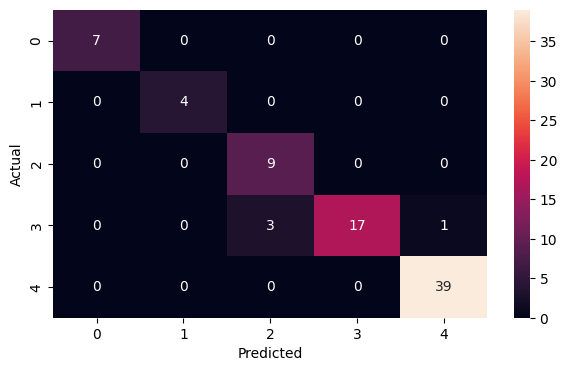

In [15]:
plt.figure(figsize=(7,4))
sns.heatmap(con_mat, annot=True,cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Visualization of tree model using sklearn and **plot_tree**

In [26]:
columns=df.drop(columns='Drug').columns
classes=df['Drug'].unique()
print(columns)
print(classes)

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')
['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [27]:
from sklearn.tree import plot_tree

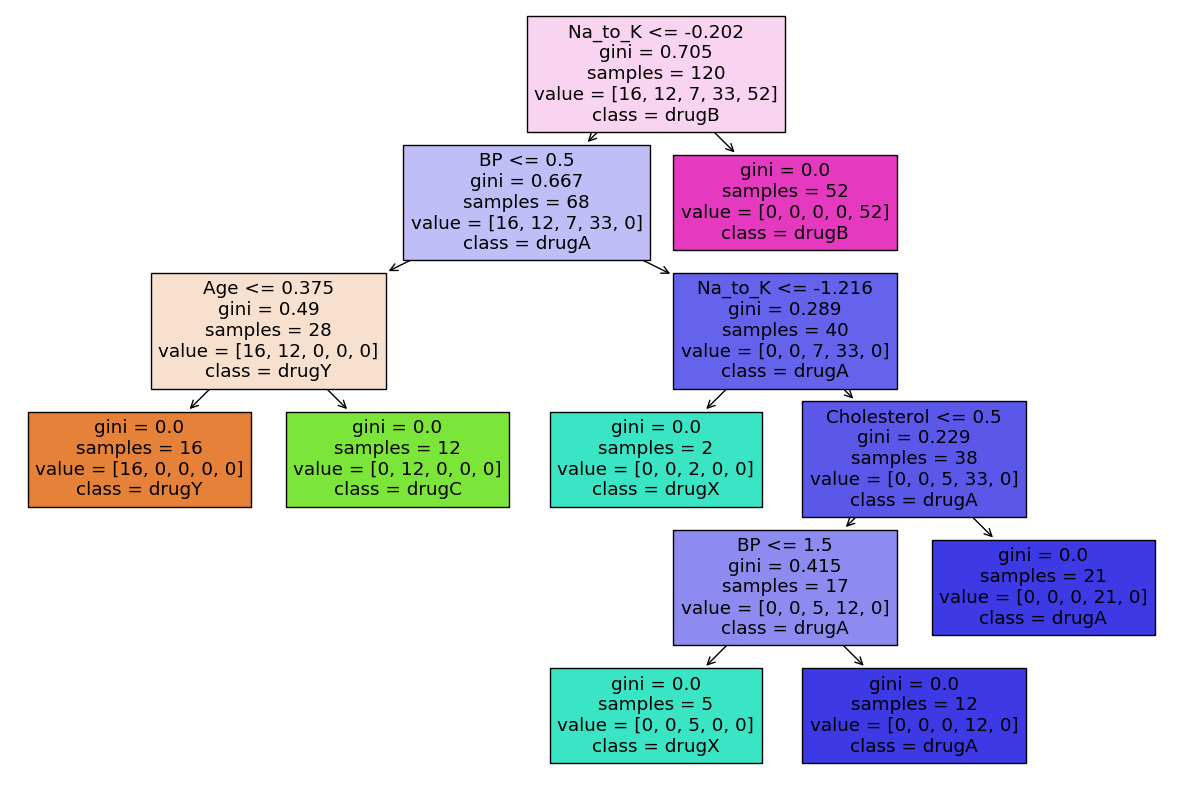

In [28]:
plt.figure(figsize=(15,10))
plot_tree(tree, feature_names=columns, class_names=classes,filled=True)
plt.show()